In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('serieTiahura_Fish_83-2023.xlsx', sheet_name='données brutes')

c:\miniconda\envs\Python_update\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data.head()

,Num.ligne,Year,Season,Date,Habitat,Diver,Transect,Family,Species,Abundance,Size (cm),Unnamed: 11
0,1,1983,Mar,1983-03-01,Fring,Rene Galzin,1,Holocentridae,Sargocentron microstoma,1,NaN,NaN
1,2,1983,Mar,1983-03-01,Fring,Rene Galzin,1,Mullidae,Mulloidichthys flavolineatus,2,NaN,NaN
2,3,1983,Mar,1983-03-01,Fring,Rene Galzin,1,Mullidae,Parupeneus cyclostomus,1,NaN,NaN
3,4,1983,Mar,1983-03-01,Fring,Rene Galzin,1,Mullidae,Parupeneus pleurostigma,3,NaN,NaN
4,5,1983,Mar,1983-03-01,Fring,Rene Galzin,1,Chaetodontidae,Chaetodon auriga,1,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58516 entries, 0 to 58515
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Num.ligne    58516 non-null  int64         
 1   Year         58516 non-null  int64         
 2   Season       58516 non-null  object        
 3   Date         58516 non-null  datetime64[ns]
 4   Habitat      58516 non-null  object        
 5   Diver        58516 non-null  object        
 6   Transect     58516 non-null  int64         
 7   Family       58516 non-null  object        
 8   Species      58516 non-null  object        
 9   Abundance    58516 non-null  int64         
 10  Size (cm)    39516 non-null  float64       
 11  Unnamed: 11  1 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 5.4+ MB


In [5]:
dict_fish = pd.read_csv('trophic_groups.csv', sep = ',', header = None)

In [6]:
# replace Species names by trophic groups
for i in range(len(dict_fish)):
    data['Species'] = data['Species'].replace(dict_fish[0][i], dict_fish[1][i])

In [7]:
# create a new column with the year and the month
data['YearSeason'] = data['Year'].astype(str) + data['Season'].astype(str)
data['YearSeason'] = pd.to_datetime(data['YearSeason'], format='%Y%b')



In [8]:
data.drop(columns = ['Num.ligne', 'Unnamed: 11', 'Diver', 'Size (cm)', 'Date', 'Year', 'Season'], inplace = True)

In [9]:
data

,Habitat,Transect,Family,Species,Abundance,YearSeason
0,Fring,1,Holocentridae,C,1,1983-03-01
1,Fring,1,Mullidae,C,2,1983-03-01
2,Fring,1,Mullidae,C,1,1983-03-01
3,Fring,1,Mullidae,C,3,1983-03-01
4,Fring,1,Chaetodontidae,Co,1,1983-03-01
...,...,...,...,...,...,...
58511,OS,4,Scaridae,H,1,2023-10-01
58512,OS,4,Scaridae,H,1,2023-10-01
58513,OS,4,Serranidae,C,1,2023-10-01
58514,OS,4,Acanthuridae,H,2,2023-10-01


In [10]:
data.drop(columns=['Family'], inplace = True)

In [11]:
data['Habitat'].unique()

array(['Fring', 'Bar', 'OS'], dtype=object)

In [12]:
data_bar = data[data['Habitat'] == 'Bar']
data_out = data[data['Habitat'] == 'OS']
data_frin = data[data['Habitat'] == 'Fring']

In [13]:
data_bar.drop(columns=['Habitat'], inplace = True)
data_out.drop(columns=['Habitat'], inplace = True)
data_frin.drop(columns=['Habitat'], inplace = True)

C:\Users\alexi\AppData\Local\Temp\ipykernel_168928\3020734919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar.drop(columns=['Habitat'], inplace = True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_168928\3020734919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_out.drop(columns=['Habitat'], inplace = True)
C:\Users\alexi\AppData\Local\Temp\ipykernel_168928\3020734919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [14]:
# moyenne sur les transects
data_bar = data_bar.groupby(['YearSeason', 'Species']).mean()
data_out = data_out.groupby(['YearSeason', 'Species']).mean()
data_frin = data_frin.groupby(['YearSeason', 'Species']).mean()


In [15]:
data_bar.drop(columns=['Transect'], inplace = True)
data_out.drop(columns=['Transect'], inplace = True)
data_frin.drop(columns=['Transect'], inplace = True)

In [16]:
# pivot table
data_bar = data_bar.pivot_table(index='YearSeason', columns='Species', values='Abundance')
data_out = data_out.pivot_table(index='YearSeason', columns='Species', values='Abundance')
data_frin = data_frin.pivot_table(index='YearSeason', columns='Species', values='Abundance')

In [17]:
# add a total abundance column for fish and organism
data_bar['Total'] = data_bar.sum(axis=1)
data_out['Total'] = data_out.sum(axis=1)
data_frin['Total'] = data_frin.sum(axis=1)


# # normalize it by the tmax abundance
# data_bar['Total'] = data_bar['Total'] / data_bar['Total'].max()
# data_out['Total'] = data_out['Total'] / data_out['Total'].max()
# data_frin['Total'] = data_frin['Total'] / data_frin['Total'].max()
# normalize the data per category for fish and organism, except for the total column

# remove the total column and save it
data_bar_total = data_bar['Total']
data_out_total = data_out['Total']
data_frin_total = data_frin['Total']

data_bar.drop(columns=['Total'], inplace=True)
data_out.drop(columns=['Total'], inplace=True)
data_frin.drop(columns=['Total'], inplace=True)


data_bar = data_bar.div(data_bar.sum(axis=1), axis=0)
data_out = data_out.div(data_out.sum(axis=1), axis=0)
data_frin = data_frin.div(data_frin.sum(axis=1), axis=0)

# add the total column back
data_bar['Total'] = data_bar_total
data_out['Total'] = data_out_total
data_frin['Total'] = data_frin_total

# fill nan values with 0
data_bar.fillna(0, inplace=True)
data_out.fillna(0, inplace=True)
data_frin.fillna(0, inplace=True)

In [18]:
data_out

Species,C,Co,H,O,P,Pi,Total
YearSeason,,,,,,,
1983-03-01,0.120354,0.062794,0.340520,0.367025,0.056979,0.052328,40.950486
1983-10-01,0.102998,0.037758,0.235285,0.444884,0.130921,0.048155,55.377055
1987-03-01,0.143558,0.078175,0.273111,0.347203,0.103486,0.054467,45.899743
1987-10-01,0.137415,0.085307,0.191683,0.318156,0.220485,0.046955,54.425508
1988-03-01,0.101830,0.056277,0.210984,0.269247,0.328834,0.032828,64.730835
...,...,...,...,...,...,...,...
2021-10-01,0.306151,0.081174,0.095611,0.170801,0.283231,0.063031,27.764052
2022-03-01,0.212457,0.081227,0.106414,0.215273,0.333464,0.051166,26.058781
2022-10-01,0.265351,0.062216,0.097394,0.252795,0.259101,0.063142,27.016444


In [19]:
data_bar.to_csv('fish_bar_1983-2023_biannuel.csv')
data_out.to_csv('fish_out_1983-2023_biannuel.csv')
data_frin.to_csv('fish_frin_1983-2023_biannuel.csv')

In [20]:
# # find the 10 most abundant families
# data_bar.sum().sort_values(ascending=False).head(7)

In [21]:
# # rename the other families as 'other'
# # find the list of the most represented families
# families = data_bar.sum().sort_values(ascending=False).head(7).index

# # select the families that are not in the list
# other_families = data_bar.columns[~data_bar.columns.isin(families)]

# # sum the abundances of the other families
# data_bar['other'] = data_bar[other_families].sum(axis=1)

# # drop the other families
# data_bar.drop(columns=other_families, inplace=True)


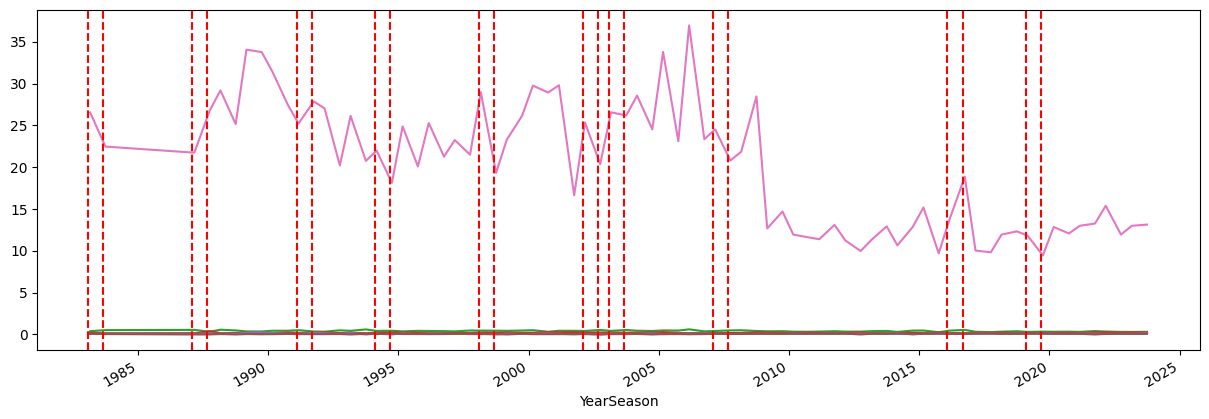

In [22]:
data_bar.plot(legend=False, figsize=(15,5))
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

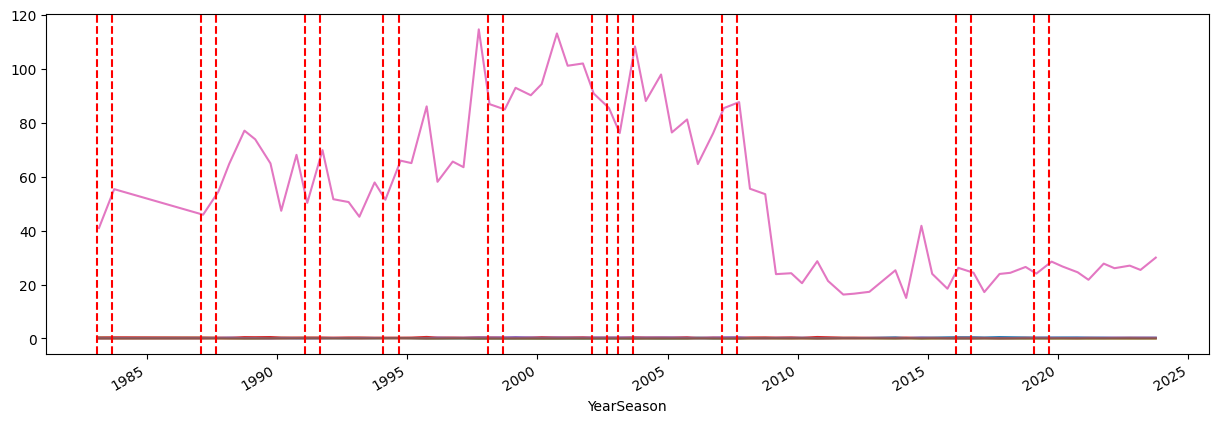

In [24]:
data_out.plot(legend=False, figsize=(15,5))
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

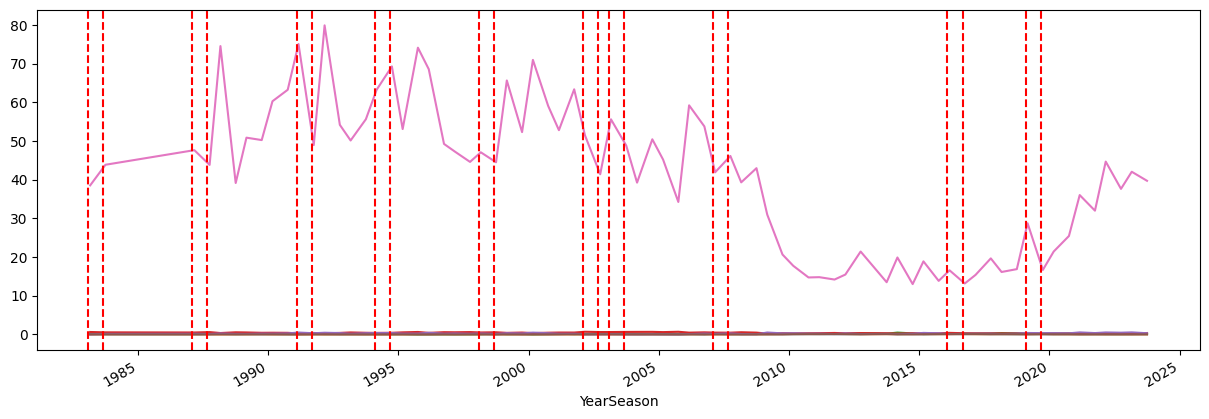

In [25]:
data_frin.plot(legend=False, figsize=(15,5))
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')